<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/PPG_Clustering/blob/main/ppg_clustering_6_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
# variables declearation 

ppgData = pd.DataFrame()   # to store dataFrame from files like 1.csv
featureDf = pd.DataFrame()  # to store all features like PCA and Systolic and Diastolic of all data
ppg_pca = pd.DataFrame()    # to store all pca of all data 
ABP_sys_dia = pd.DataFrame() # to store all systolic and diastolic obtained from ABP signals of all data



In [4]:
data = pd.read_csv("/content/gdrive/MyDrive/data/sys_dia_pca1_pca2.csv")

In [5]:
data["sys_dia"] = data["systolic"] / data['diastolic']

In [6]:
data.head()

,Unnamed: 0,systolic,diastolic,pca1,pca2,sys_dia
0,0,144.43,52.947,0.448304,0.068589,2.727822
1,1,144.43,52.947,0.108880,-0.028446,2.727822
2,2,143.36,52.752,0.464056,0.471354,2.717622
3,3,146.48,54.998,-0.089028,-0.016251,2.663370
4,4,177.11,65.060,-0.213127,0.035350,2.722256


In [7]:

data = data.drop("diastolic",axis = 1)
data = data.drop("systolic",axis = 1)
data = data.drop("Unnamed: 0",axis = 1)

In [8]:
data.head()

,pca1,pca2,sys_dia
0,0.448304,0.068589,2.727822
1,0.108880,-0.028446,2.727822
2,0.464056,0.471354,2.717622
3,-0.089028,-0.016251,2.663370
4,-0.213127,0.035350,2.722256


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
 
  # initialise kmeans
kmeans = KMeans(n_clusters = 6)
kmeans.fit(data)
cluster_labels = kmeans.labels_
  

In [10]:
np.unique(cluster_labels)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
pca.fit(data)
PCA_values = pca.transform(data)

In [20]:
PCA_values[cluster_labels == 0]

array([[ 5.14253456,  2.41719763],
       [ 6.2621641 ,  0.25442592],
       [ 5.74176593,  0.94385995],
       ...,
       [ 4.67979203,  4.35170991],
       [ 3.75095327,  3.37923902],
       [ 5.95020335, -1.58450505]])

In [26]:
label0 = data[cluster_labels == 0]

In [25]:
label1 = data[cluster_labels == 1]
label2 = data[cluster_labels == 2]
label3 = data[cluster_labels == 3]
label4 = data[cluster_labels == 4]
label5 = data[cluster_labels == 5]

In [29]:
label0.head()

,pca1,pca2,sys_dia
476,5.142607,2.417110,1.701754
492,6.262237,0.254336,1.694934
493,5.741824,0.943788,1.772624
495,6.147000,2.327851,1.700203
498,5.210947,0.961450,1.738507


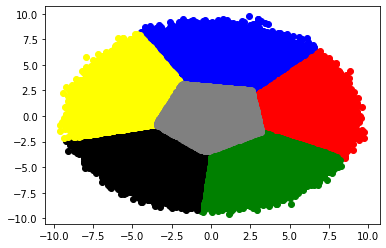

In [38]:
import matplotlib.pyplot as plt 
plt.scatter(label0["pca1"],label0["pca2"],color = "red")
plt.scatter(label1["pca1"],label1["pca2"],color = "green")
plt.scatter(label2["pca1"],label2["pca2"],color = "black")
plt.scatter(label3["pca1"],label3["pca2"],color = "blue")
plt.scatter(label4["pca1"],label4["pca2"],color = "yellow")
plt.scatter(label5["pca1"],label5["pca2"],color = "gray")
plt.show()


In [37]:
label0["pca1"]

476       5.142607
492       6.262237
493       5.741824
495       6.147000
498       5.210947
            ...   
205518    2.885059
205648    4.231106
205651    4.679964
205689    3.751009
205694    5.950320
Name: pca1, Length: 16636, dtype: float64